# <h1><center>Predicting the alpha signal using microblogging data</center></h1> 

**Hedge funds** : 

- 'Hedge' means to safeguard and in the context of investing it means to protect against risks.
- A hedge fund uses the funds collected from accredited investors like banks, insurance firms, High Net-Worth Individuals (HNIs) & families.
- A hedge fund portfolio consists of asset classes such as derivatives, equities, bonds, currencies, and convertible securities.

**Alpha** :

- Alpha is used in finance as a measure of performance, indicating when a strategy, trader, or portfolio manager has managed to beat the market return over some period
- It is commonly used to rank active mutual funds as well as all other types of investments. It is often represented as a single number (like +3.0 or -5.0)
- It is the part of the return unrelated to any risk premium


**Problem Statement** :

- Our goal is to build a model predict Alpha Signal with the given 7 financial factors 

- After that build a sentiment analysis model using the tagged data and then be used to generate a new stock factor which together with the other stock factors should be used to predict the Alpha Signal.

Stocktwits [https://stocktwits.com]
- The largest community for investors and traders we can see what actual investors and traders are saying in real time about the stocks, crypto, futures, and forex.

In [3]:
import json
import pandas as pd
from pandas.io.json import json_normalize # to convert json file to dataframe

#### First we should read the json file and convert into a dataframme

In [4]:
with open('/Users/gowtham/Downloads/PHD_BATCH_67_101119/train_data-1573118738755.json') as f:
    a=json.load(f)

In [5]:
with open('/Users/gowtham/Downloads/TestData/test_data.json') as k:
    b=json.load(k)

In [6]:
#to conert to a dataframe
train= json_normalize(a['records'])

In [7]:
#to conert to a dataframe
test= json_normalize(b['records'])

In [8]:
train.head()

,sentiment_score,stocktwit_tweet,ticker,timestamp
0,3,$AMD going up but hesitating however chart is ...,$AMD,2018-09-19 18:38:28+00:00
1,3,@inforlong @MariaGascon Despite\nChina trade w...,$CAT,2018-10-09 03:51:06+00:00
2,2,$AVGO WTF?,$AVGO,2018-07-12 13:35:32+00:00
3,2,$PH\n New Insider Filing On: \n MULLER KLAUS P...,$PH,2018-07-19 03:32:50+00:00
4,3,$FB if it bounces tommorrow do the right thing...,$FB,2018-08-23 19:07:54+00:00


In [9]:
test.head()

,stocktwit_tweet,ticker,timestamp
0,$CELG nothing to be exited about,$CELG,2018-10-25 14:26:16+00:00
1,$AMD yall exhaust your buyer on first green ca...,$AMD,2018-07-13 13:50:39+00:00
2,$AMD day traders day.,$AMD,2018-09-25 19:10:54+00:00
3,$CBS https://tenor.com/wLB8.gif,$CBS,2018-07-27 22:45:48+00:00
4,$MU weak price action so far today. Don’t be a...,$MU,2018-07-31 14:59:06+00:00


In [10]:
train.tail(5)

,sentiment_score,stocktwit_tweet,ticker,timestamp
1039126,2,$CLF https://twitter.com/hrdrckminer/status/10...,$CLF,2018-08-13 22:15:04+00:00
1039127,3,$AMD 🔥🔥🔥,$AMD,2018-09-04 15:25:59+00:00
1039128,0,$FB damn should of shorted 196 after hours to ...,$FB,2018-07-25 21:29:03+00:00
1039129,0,$AMD back to the 31&#39;s,$AMD,2018-09-28 16:19:55+00:00
1039130,2,$AMZN Lagging other tech today.,$AMZN,2018-07-05 17:14:00+00:00


In [11]:
test.tail()

,stocktwit_tweet,ticker,timestamp
265017,$CVS recent bad PR made this an easy pick to l...,$CVS,2018-07-20 15:54:50+00:00
265018,Here’s what 16 Estimize analysts believe $S wi...,$S,2018-10-24 22:56:18+00:00
265019,"$AMD Could be at 18 or high 17s. If not, will...",$AMD,2018-07-25 21:48:25+00:00
265020,$TSN files form 10-Q https://fintel.io/filings...,$TSN,2018-08-06 11:43:24+00:00
265021,$AAPL looks like it is solidly supporting its ...,$AAPL,2018-09-27 18:28:58+00:00


In [12]:
#to find the shape
train.shape

(1039131, 4)

In [13]:
#to find the shape
test.shape

(265022, 3)

In [14]:
#to know the info of the variables
train.describe(include = 'all')

,sentiment_score,stocktwit_tweet,ticker,timestamp
count,1.039131e+06,1039131,1039131,1039131
unique,NaN,959608,2181,905458
top,NaN,$AMD,$AMD,2018-08-13 14:00:03+00:00
freq,NaN,2474,163675,65
mean,2.203079e+00,NaN,NaN,NaN
std,1.105371e+00,NaN,NaN,NaN
min,0.000000e+00,NaN,NaN,NaN
25%,2.000000e+00,NaN,NaN,NaN
50%,2.000000e+00,NaN,NaN,NaN
75%,3.000000e+00,NaN,NaN,NaN


In [15]:
#to know the info of the variables
test.describe(include='all')

,stocktwit_tweet,ticker,timestamp
count,265022,265022,265022
unique,252890,1444,254753
top,$AMD,$AMD,2018-10-29 14:00:03+00:00
freq,622,42140,18


In [16]:
# to check the null values
train.isna().sum()

sentiment_score    0
stocktwit_tweet    0
ticker             0
timestamp          0
dtype: int64

In [17]:
# to check the null values
test.isna().sum()

stocktwit_tweet    0
ticker             0
timestamp          0
dtype: int64

# Introduction

Sentiment analysis is part of the Natural Language Processing (NLP) techniques that consists in extracting emotions related to some raw texts. This is usually used on social media posts and customer reviews in order to automatically understand if some users are positive or negative and why. The goal of this study is to show how sentiment analysis can be performed using python. Here are some of the main libraries we will use:

- NLTK: the most famous python module for NLP techniques

- Scikit-learn: the most used python machine learning library



# sentiment score count with bar graph

In [18]:
train.sentiment_score.value_counts().plot(kind='bar')

# Exploratory data analysis


In order to have a better understanding of our data, let's explore it a little:

# Donut chart of the sentiment score with percentage 

In [19]:
verybad = train.sentiment_score.value_counts()[0]
bad = train.sentiment_score.value_counts()[1]
average = train.sentiment_score.value_counts()[2]
good = train.sentiment_score.value_counts()[3]
verygood = train.sentiment_score.value_counts()[4]

In [21]:
import matplotlib.pyplot as plt

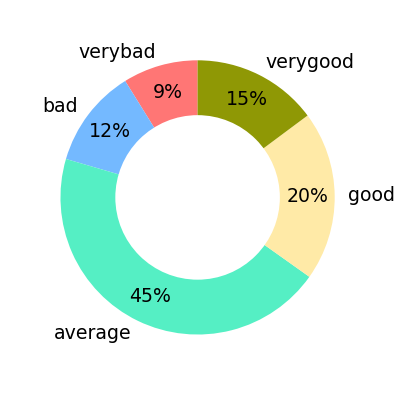

In [22]:
category_names = ['verybad','bad','average','good','verygood']
sizes = [verybad,bad,average,good,verygood]
custom_colours = ['#ff7675', '#74b9ff','#55efc4', '#ffeaa7','#8f9805']

plt.figure(figsize=(2, 2), dpi=227)
plt.pie(sizes, labels=category_names, textprops={'fontsize': 6}, startangle=90, 
       autopct='%1.0f%%', colors=custom_colours, pctdistance=0.8)

# draw circle
centre_circle = plt.Circle((0, 0), radius=0.6, fc='white')
plt.gca().add_artist(centre_circle)

plt.show()

In [23]:
train['timestamp']  = pd.to_datetime(train['timestamp'],dayfirst=True)# converting the date time format

In [24]:
test['timestamp']  = pd.to_datetime(test['timestamp'],dayfirst=True)# converting the date time format

In [25]:
# to know the types od the columns data
train.dtypes 

sentiment_score                  int64
stocktwit_tweet                 object
ticker                          object
timestamp          datetime64[ns, UTC]
dtype: object

In [26]:
# to know the types od the columns data
test.dtypes

stocktwit_tweet                 object
ticker                          object
timestamp          datetime64[ns, UTC]
dtype: object

In [27]:
train.timestamp.describe() # to see the range of dates

count                       1039131
unique                       905458
top       2018-08-13 14:00:03+00:00
freq                             65
first     2018-07-01 00:00:09+00:00
last      2018-10-31 23:59:57+00:00
Name: timestamp, dtype: object

In [28]:
test.timestamp.describe() # to see the range of dates

count                        265022
unique                       254753
top       2018-10-29 14:00:03+00:00
freq                             18
first     2018-07-01 00:01:24+00:00
last      2018-10-31 23:58:10+00:00
Name: timestamp, dtype: object

In [29]:
#seperating the timestamp to date and time
data = [train]
for i in data:
    i['date'] = i['timestamp'].dt.date
    i['time'] = i['timestamp'].dt.time

In [30]:
#seperating the timestamp to date and time
data = [test]
for i in data:
    i['date'] = i['timestamp'].dt.date
    i['time'] = i['timestamp'].dt.time

In [31]:
#dropping thre timestamp as we seperated the files
train.drop(["timestamp"], axis = 1, inplace = True)

In [32]:
#dropping thre timestamp as we seperated the files
test.drop(["timestamp"], axis = 1, inplace = True)

In [33]:
train.head()

,sentiment_score,stocktwit_tweet,ticker,date,time
0,3,$AMD going up but hesitating however chart is ...,$AMD,2018-09-19,18:38:28
1,3,@inforlong @MariaGascon Despite\nChina trade w...,$CAT,2018-10-09,03:51:06
2,2,$AVGO WTF?,$AVGO,2018-07-12,13:35:32
3,2,$PH\n New Insider Filing On: \n MULLER KLAUS P...,$PH,2018-07-19,03:32:50
4,3,$FB if it bounces tommorrow do the right thing...,$FB,2018-08-23,19:07:54


In [34]:
test.head()

,stocktwit_tweet,ticker,date,time
0,$CELG nothing to be exited about,$CELG,2018-10-25,14:26:16
1,$AMD yall exhaust your buyer on first green ca...,$AMD,2018-07-13,13:50:39
2,$AMD day traders day.,$AMD,2018-09-25,19:10:54
3,$CBS https://tenor.com/wLB8.gif,$CBS,2018-07-27,22:45:48
4,$MU weak price action so far today. Don’t be a...,$MU,2018-07-31,14:59:06


In [35]:
train.dtypes

sentiment_score     int64
stocktwit_tweet    object
ticker             object
date               object
time               object
dtype: object

In [36]:
test.dtypes

stocktwit_tweet    object
ticker             object
date               object
time               object
dtype: object

In [37]:
#converting object to datetime format
train['date']  = pd.to_datetime(train['date'])

In [38]:
#converting object to datetime format
test['date']  = pd.to_datetime(test['date'])

In [39]:
train.dtypes

sentiment_score             int64
stocktwit_tweet            object
ticker                     object
date               datetime64[ns]
time                       object
dtype: object

In [40]:
test.dtypes

stocktwit_tweet            object
ticker                     object
date               datetime64[ns]
time                       object
dtype: object

In [41]:
#dropping time column as we dont have been mentioned in the csv file
train.drop(["time"], axis = 1, inplace = True)

In [42]:
#dropping time column as we dont have been mentioned in the csv file
test.drop(["time"], axis = 1, inplace = True)

In [43]:
train.head()

,sentiment_score,stocktwit_tweet,ticker,date
0,3,$AMD going up but hesitating however chart is ...,$AMD,2018-09-19
1,3,@inforlong @MariaGascon Despite\nChina trade w...,$CAT,2018-10-09
2,2,$AVGO WTF?,$AVGO,2018-07-12
3,2,$PH\n New Insider Filing On: \n MULLER KLAUS P...,$PH,2018-07-19
4,3,$FB if it bounces tommorrow do the right thing...,$FB,2018-08-23


In [44]:
test.head()

,stocktwit_tweet,ticker,date
0,$CELG nothing to be exited about,$CELG,2018-10-25
1,$AMD yall exhaust your buyer on first green ca...,$AMD,2018-07-13
2,$AMD day traders day.,$AMD,2018-09-25
3,$CBS https://tenor.com/wLB8.gif,$CBS,2018-07-27
4,$MU weak price action so far today. Don’t be a...,$MU,2018-07-31


In [45]:
#making a master copy
train1= train.copy()
test1=test.copy()

In [46]:
train1.dtypes

sentiment_score             int64
stocktwit_tweet            object
ticker                     object
date               datetime64[ns]
dtype: object

# Regular expressions

A regular expression is a special sequence of characters that helps you match or find other strings or sets of strings, using a specialized syntax held in a pattern. Regular expressions are widely used in UNIX world

In [47]:
#to remove HTML links
train.stocktwit_tweet=train.stocktwit_tweet.replace('\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', '',regex=True).astype(object)
test.stocktwit_tweet=test.stocktwit_tweet.replace('\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', '',regex=True).astype(object)

In [48]:
train.tail()

,sentiment_score,stocktwit_tweet,ticker,date
1039126,2,$CLF,$CLF,2018-08-13
1039127,3,$AMD 🔥🔥🔥,$AMD,2018-09-04
1039128,0,$FB damn should of shorted 196 after hours to ...,$FB,2018-07-25
1039129,0,$AMD back to the 31&#39;s,$AMD,2018-09-28
1039130,2,$AMZN Lagging other tech today.,$AMZN,2018-07-05


In [49]:
test.tail()

,stocktwit_tweet,ticker,date
265017,$CVS recent bad PR made this an easy pick to l...,$CVS,2018-07-20
265018,Here’s what 16 Estimize analysts believe $S wi...,$S,2018-10-24
265019,"$AMD Could be at 18 or high 17s. If not, will...",$AMD,2018-07-25
265020,$TSN files form 10-Q,$TSN,2018-08-06
265021,$AAPL looks like it is solidly supporting its ...,$AAPL,2018-09-27


In [50]:
# to remove tickers from the sentiment score
train.stocktwit_tweet=train.stocktwit_tweet.replace('\$\w+', '',regex=True).astype(object)
train.stocktwit_tweet=train.stocktwit_tweet.replace('\@\w+', '',regex=True).astype(object)
train.stocktwit_tweet=train.stocktwit_tweet.replace('\#\w+', '',regex=True).astype(object)

In [51]:
# to remove tickers from the sentiment score
test.stocktwit_tweet=test.stocktwit_tweet.replace('\$\w+', '',regex=True).astype(object)
test.stocktwit_tweet=test.stocktwit_tweet.replace('\@\w+', '',regex=True).astype(object)
test.stocktwit_tweet=test.stocktwit_tweet.replace('\#\w+', '',regex=True).astype(object)

In [52]:
train.head(20)

,sentiment_score,stocktwit_tweet,ticker,date
0,3,going up but hesitating however chart is very...,$AMD,2018-09-19
1,3,Despite\nChina trade war held very well 👍,$CAT,2018-10-09
2,2,WTF?,$AVGO,2018-07-12
3,2,\n New Insider Filing On: \n MULLER KLAUS PETE...,$PH,2018-07-19
4,3,if it bounces tommorrow do the right thing an...,$FB,2018-08-23
5,0,as usual......RED \nevery day.,$FB,2018-08-02
6,2,UnitedHealth Group Goes Ex-Dividend Today,$AET,2018-09-07
7,4,let&;s see when we can hit 310,$NOC,2018-09-12
8,2,I bet you’re also the one saying should be ...,$AMZN,2018-10-28
9,2,Pastor the Stooge,$AMD,2018-08-17


In [53]:
test.head()

,stocktwit_tweet,ticker,date
0,nothing to be exited about,$CELG,2018-10-25
1,yall exhaust your buyer on first green candle...,$AMD,2018-07-13
2,day traders day.,$AMD,2018-09-25
3,,$CBS,2018-07-27
4,weak price action so far today. Don’t be afra...,$MU,2018-07-31


In [54]:
train.stocktwit_tweet=train.stocktwit_tweet.replace('[^\w]', ' ',regex=True).astype(object)# to keep only words
train.stocktwit_tweet=train.stocktwit_tweet.replace('[\d]', ' ',regex=True).astype(object)# to remove digits

In [55]:
test.stocktwit_tweet=test.stocktwit_tweet.replace('[^\w]', ' ',regex=True).astype(object)# to keep only words
test.stocktwit_tweet=test.stocktwit_tweet.replace('[\d]', ' ',regex=True).astype(object)# to remove digits

In [56]:
train.head(15)

,sentiment_score,stocktwit_tweet,ticker,date
0,3,going up but hesitating however chart is very...,$AMD,2018-09-19
1,3,Despite China trade war held very well,$CAT,2018-10-09
2,2,WTF,$AVGO,2018-07-12
3,2,New Insider Filing On MULLER KLAUS PETER ...,$PH,2018-07-19
4,3,if it bounces tommorrow do the right thing an...,$FB,2018-08-23
5,0,as usual RED every day,$FB,2018-08-02
6,2,UnitedHealth Group Goes Ex Dividend Today,$AET,2018-09-07
7,4,let s see when we can hit,$NOC,2018-09-12
8,2,I bet you re also the one saying should be ...,$AMZN,2018-10-28
9,2,Pastor the Stooge,$AMD,2018-08-17


In [57]:
test.tail()

,stocktwit_tweet,ticker,date
265017,recent bad PR made this an easy pick to load ...,$CVS,2018-07-20
265018,Here s what Estimize analysts believe will...,$S,2018-10-24
265019,Could be at or high s If not will sti...,$AMD,2018-07-25
265020,files form Q,$TSN,2018-08-06
265021,looks like it is solidly supporting its gains...,$AAPL,2018-09-27


Now let's print some wordclouds to have a glimpse at what kind of words appear in our data:

# WORDCLOUD

In [69]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


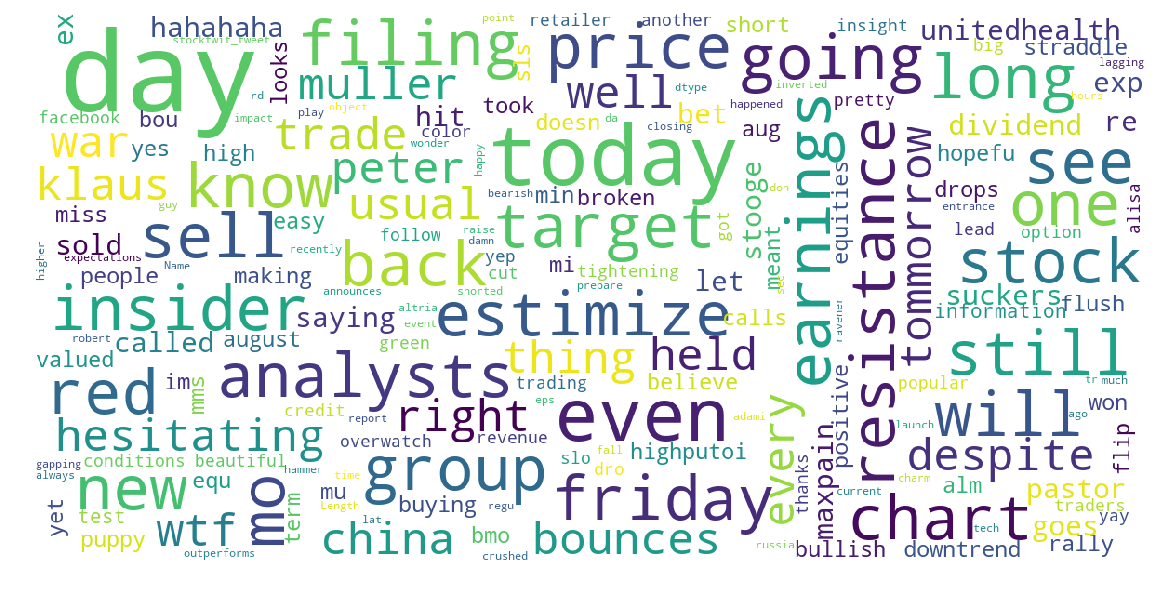

In [70]:
# wordcloud function

from wordcloud import WordCloud
import matplotlib.pyplot as plt

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 500,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()
    
# print wordcloud
show_wordcloud(train["stocktwit_tweet"])#word cloud for train

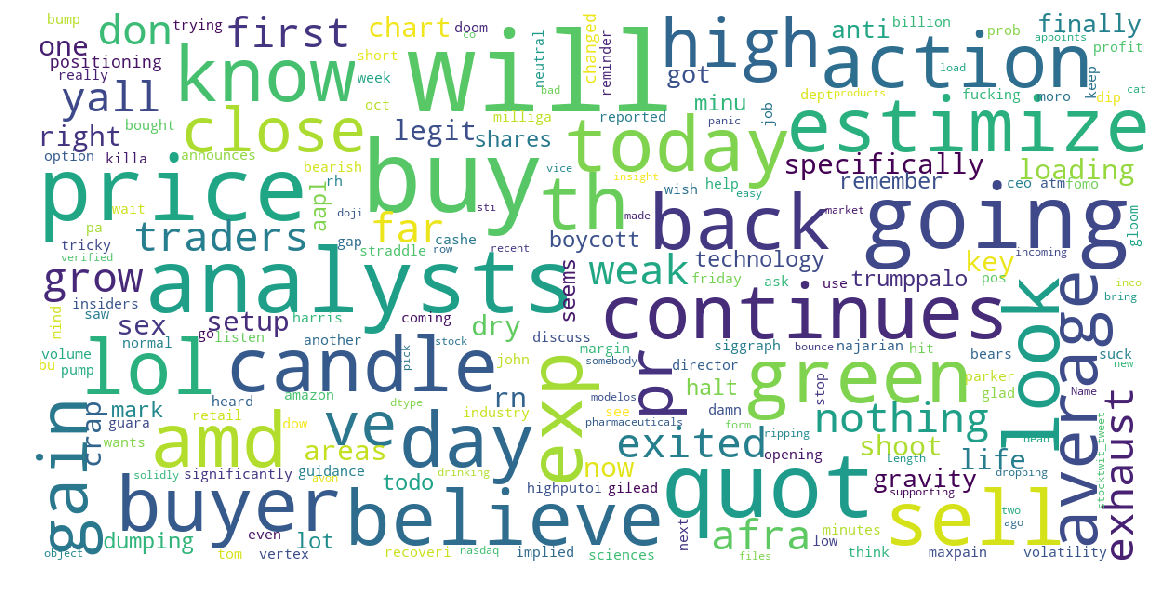

In [71]:
show_wordcloud(test["stocktwit_tweet"])#word cloud for test

To clean textual data, we perform several transformations:
- lower the text

- remove useless stop words like 'the', 'a' ,'this' etc.

- tokenize the text (split the text into words)

- lemmatize the text: transform every word into their root form (e.g. rooms -> room, slept -> sleep)

Now we clean our data, so that we can do some feature engineering for our modelization part.

In [72]:
#TO LOWER CASE THE DATA IN THE STOCKTWIT
train.stocktwit_tweet = train.stocktwit_tweet.apply(lambda x : x.lower())

In [73]:
#TO LOWER CASE THE DATA IN THE STOCKTWIT
test.stocktwit_tweet = test.stocktwit_tweet.apply(lambda x : x.lower())

In [74]:
train.head()

,sentiment_score,stocktwit_tweet,ticker,date
0,3,going up but hesitating however chart is very...,$AMD,2018-09-19
1,3,despite china trade war held very well,$CAT,2018-10-09
2,2,wtf,$AVGO,2018-07-12
3,2,new insider filing on muller klaus peter ...,$PH,2018-07-19
4,3,if it bounces tommorrow do the right thing an...,$FB,2018-08-23


In [75]:
test.head()

,stocktwit_tweet,ticker,date
0,nothing to be exited about,$CELG,2018-10-25
1,yall exhaust your buyer on first green candle...,$AMD,2018-07-13
2,day traders day,$AMD,2018-09-25
3,,$CBS,2018-07-27
4,weak price action so far today don t be afra...,$MU,2018-07-31


In [76]:
from nltk.corpus import stopwords


In [77]:
from nltk.corpus import stopwords
stopwords = stopwords.words("english")
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [78]:
# Adding stopwords to the list of stopwords
words=['exp','maxpain','highputoi','highcalloi','amc','bmo','er','amp']
for word in words:
    stopwords.append(word)

In [79]:
#checking the length of stopwords
len(stopwords)

187

In [80]:
# Removing stopwords  from the list of stopwords
words=['up','not','but','above']
for word in words:
    stopwords.remove(word)

In [81]:
#checking the length of stopwords
len(stopwords)

183

# Removing stopwords in both train & test

In [82]:
train['stocktwit_tweet'] = train['stocktwit_tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in stopwords))


In [83]:
train.head(15)

,sentiment_score,stocktwit_tweet,ticker,date
0,3,going up but hesitating however chart stable g...,$AMD,2018-09-19
1,3,despite china trade war held well,$CAT,2018-10-09
2,2,wtf,$AVGO,2018-07-12
3,2,new insider filing muller klaus peter transact...,$PH,2018-07-19
4,3,bounces tommorrow right thing gtfo,$FB,2018-08-23
5,0,usual red every day,$FB,2018-08-02
6,2,unitedhealth group goes ex dividend today,$AET,2018-09-07
7,4,let see hit,$NOC,2018-09-12
8,2,bet also one saying smh,$AMZN,2018-10-28
9,2,pastor stooge,$AMD,2018-08-17


In [84]:
test['stocktwit_tweet'] = test['stocktwit_tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in stopwords))

In [85]:
test.head()

,stocktwit_tweet,ticker,date
0,nothing exited,$CELG,2018-10-25
1,yall exhaust buyer first green candle byeeeeee,$AMD,2018-07-13
2,day traders day,$AMD,2018-09-25
3,,$CBS,2018-07-27
4,weak price action far today afraid go short go...,$MU,2018-07-31


In [86]:
#just keeping the words which are more than 1
train['stocktwit_tweet']= train['stocktwit_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>1]))

In [87]:
#just keeping the words which are more than 1
test['stocktwit_tweet']= test['stocktwit_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>1]))

In [88]:
train.head()

,sentiment_score,stocktwit_tweet,ticker,date
0,3,going up but hesitating however chart stable g...,$AMD,2018-09-19
1,3,despite china trade war held well,$CAT,2018-10-09
2,2,wtf,$AVGO,2018-07-12
3,2,new insider filing muller klaus peter transact...,$PH,2018-07-19
4,3,bounces tommorrow right thing gtfo,$FB,2018-08-23


In [89]:
test.head()

,stocktwit_tweet,ticker,date
0,nothing exited,$CELG,2018-10-25
1,yall exhaust buyer first green candle byeeeeee,$AMD,2018-07-13
2,day traders day,$AMD,2018-09-25
3,,$CBS,2018-07-27
4,weak price action far today afraid go short go...,$MU,2018-07-31


# TOKENIZATION FOR BOTH TRAIN & TEST

In [90]:
from nltk.tokenize import word_tokenize


In [91]:
train['stocktwit_tweet']=train['stocktwit_tweet'].apply(lambda text: word_tokenize(text))

In [92]:
test['stocktwit_tweet']=test['stocktwit_tweet'].apply(lambda text: word_tokenize(text))

In [93]:
train.head()

,sentiment_score,stocktwit_tweet,ticker,date
0,3,"[going, up, but, hesitating, however, chart, s...",$AMD,2018-09-19
1,3,"[despite, china, trade, war, held, well]",$CAT,2018-10-09
2,2,[wtf],$AVGO,2018-07-12
3,2,"[new, insider, filing, muller, klaus, peter, t...",$PH,2018-07-19
4,3,"[bounces, tommorrow, right, thing, gtfo]",$FB,2018-08-23


In [94]:
test.head()

,stocktwit_tweet,ticker,date
0,"[nothing, exited]",$CELG,2018-10-25
1,"[yall, exhaust, buyer, first, green, candle, b...",$AMD,2018-07-13
2,"[day, traders, day]",$AMD,2018-09-25
3,[],$CBS,2018-07-27
4,"[weak, price, action, far, today, afraid, go, ...",$MU,2018-07-31


# LEMMITIZATION FOR BOTH TRAIN & TEST

In [98]:
from nltk.stem import WordNetLemmatizer
lmtzr = WordNetLemmatizer()

In [100]:

def lemmatizer(text):
    text = " ".join([lmtzr.lemmatize(w,'v') for w in text])
    return text



In [101]:
train['stocktwit_tweet'] = train['stocktwit_tweet'].apply(lambda x: lemmatizer(x))

In [102]:
test['stocktwit_tweet'] = test['stocktwit_tweet'].apply(lambda x: lemmatizer(x))

In [103]:
train.head(20)

,sentiment_score,stocktwit_tweet,ticker,date
0,3,go up but hesitate however chart stable go upward,$AMD,2018-09-19
1,3,despite china trade war hold well,$CAT,2018-10-09
2,2,wtf,$AVGO,2018-07-12
3,2,new insider file muller klaus peter transactio...,$PH,2018-07-19
4,3,bounce tommorrow right thing gtfo,$FB,2018-08-23
5,0,usual red every day,$FB,2018-08-02
6,2,unitedhealth group go ex dividend today,$AET,2018-09-07
7,4,let see hit,$NOC,2018-09-12
8,2,bet also one say smh,$AMZN,2018-10-28
9,2,pastor stooge,$AMD,2018-08-17


In [104]:
test.head()

,stocktwit_tweet,ticker,date
0,nothing exit,$CELG,2018-10-25
1,yall exhaust buyer first green candle byeeeeee,$AMD,2018-07-13
2,day traders day,$AMD,2018-09-25
3,,$CBS,2018-07-27
4,weak price action far today afraid go short go...,$MU,2018-07-31


In [105]:
train.stocktwit_tweet[2400]# FOR CHECKING THE PARRTICULAR DATA OF A ROW

'asymco iphone price look stable time but see new strategy above red line premium line'

In [106]:
train.tail()

,sentiment_score,stocktwit_tweet,ticker,date
1039126,2,,$CLF,2018-08-13
1039127,3,,$AMD,2018-09-04
1039128,0,damn short hours late,$FB,2018-07-25
1039129,0,back,$AMD,2018-09-28
1039130,2,lag tech today,$AMZN,2018-07-05


In [107]:
train.head(20)

,sentiment_score,stocktwit_tweet,ticker,date
0,3,go up but hesitate however chart stable go upward,$AMD,2018-09-19
1,3,despite china trade war hold well,$CAT,2018-10-09
2,2,wtf,$AVGO,2018-07-12
3,2,new insider file muller klaus peter transactio...,$PH,2018-07-19
4,3,bounce tommorrow right thing gtfo,$FB,2018-08-23
5,0,usual red every day,$FB,2018-08-02
6,2,unitedhealth group go ex dividend today,$AET,2018-09-07
7,4,let see hit,$NOC,2018-09-12
8,2,bet also one say smh,$AMZN,2018-10-28
9,2,pastor stooge,$AMD,2018-08-17


In [108]:
#To check the rarewords in the data for train
freq = pd.Series(' '.join(train['stocktwit_tweet']).split()).value_counts()[-40200:]
freq

processori                2
shakiness                 2
shinny                    2
flattest                  2
micronaut                 2
cheque                    2
shakeups                  2
tutu                      2
sanguine                  2
mudslide                  2
troublesome               2
yawnnnn                   2
clothespin                2
uav                       2
cbnc                      2
mintues                   2
vineyards                 2
opiate                    2
kavanuagh                 2
leaderboard               2
bught                     2
cabrones                  2
completions               2
brickmortar               2
xact                      2
cisneros                  2
buiding                   2
sellofff                  2
conff                     2
resor                     2
                         ..
chillaxitive              1
perrten                   1
grandissimo               1
tabasco                   1
рамках              

In [109]:
#To check the rarewords in the data for train
freq = pd.Series(' '.join(test['stocktwit_tweet']).split()).value_counts()[-18300:]
freq

knucklehead      2
frig             2
pboc             2
heavyweights     2
powr             2
discrepancies    2
aos              2
intrested        2
validity         2
pmkt             2
napoleon         2
boomshakalaka    2
chicks           2
yorker           2
smirk            2
pwk              2
genetics         2
headfakes        2
yaa              2
sone             2
contrive         2
egpu             2
fragment         2
bluesky          2
sovereign        2
jow              2
sierra           2
droid            2
beech            2
wih              2
                ..
flexglue         1
truman           1
wondrous         1
mehorta          1
gonget           1
sellof           1
spinners         1
bama             1
herex            1
imraldi          1
dataflow         1
sheres           1
weake            1
withsurginge     1
monsta           1
weasels          1
bullwinkle       1
mh               1
snob             1
towns            1
inversed         1
posiiton    

# To check the most comon words of train data & test data

In [110]:
from collections import Counter
cnt = Counter()
for text in train["stocktwit_tweet"].values:
    for word in text.split():
        cnt[word] += 1
        
cnt.most_common(20000)

[('up', 85224),
 ('buy', 80171),
 ('go', 75399),
 ('report', 70162),
 ('short', 66470),
 ('get', 52715),
 ('call', 51161),
 ('today', 49102),
 ('sell', 48818),
 ('not', 47223),
 ('trade', 46491),
 ('stock', 45214),
 ('earn', 36963),
 ('share', 35561),
 ('but', 35407),
 ('see', 34538),
 ('like', 34342),
 ('estimize', 34077),
 ('volume', 33074),
 ('look', 32963),
 ('market', 32321),
 ('day', 31904),
 ('back', 30890),
 ('good', 28764),
 ('next', 28293),
 ('hold', 27686),
 ('time', 27418),
 ('price', 27254),
 ('analysts', 27015),
 ('come', 26861),
 ('new', 26714),
 ('put', 26469),
 ('quot', 26085),
 ('tomorrow', 25368),
 ('eps', 25106),
 ('long', 24799),
 ('week', 24573),
 ('still', 24443),
 ('bear', 24304),
 ('close', 23725),
 ('expect', 23115),
 ('revenue', 22279),
 ('last', 22228),
 ('move', 22227),
 ('make', 21788),
 ('lol', 21707),
 ('think', 21581),
 ('growth', 20682),
 ('take', 19491),
 ('say', 19470),
 ('bull', 19425),
 ('let', 19022),
 ('higher', 18107),
 ('big', 18092),
 ('break'

In [111]:
from collections import Counter
cnt1 = Counter()
for text in test["stocktwit_tweet"].values:
    for word in text.split():
        cnt1[word] += 1
        
cnt1.most_common(20000)

[('up', 21800),
 ('buy', 20458),
 ('go', 19452),
 ('report', 17876),
 ('short', 16851),
 ('get', 13539),
 ('call', 13154),
 ('today', 12567),
 ('sell', 12499),
 ('not', 12075),
 ('trade', 11895),
 ('stock', 11636),
 ('earn', 9457),
 ('but', 9092),
 ('share', 8895),
 ('like', 8841),
 ('see', 8703),
 ('estimize', 8669),
 ('look', 8405),
 ('volume', 8392),
 ('day', 8361),
 ('market', 8269),
 ('back', 7754),
 ('good', 7313),
 ('next', 7235),
 ('hold', 7008),
 ('analysts', 6953),
 ('price', 6830),
 ('time', 6802),
 ('put', 6784),
 ('quot', 6711),
 ('new', 6701),
 ('come', 6653),
 ('tomorrow', 6551),
 ('still', 6293),
 ('long', 6275),
 ('eps', 6269),
 ('week', 6224),
 ('bear', 6090),
 ('close', 5940),
 ('expect', 5924),
 ('last', 5847),
 ('revenue', 5764),
 ('move', 5688),
 ('make', 5652),
 ('think', 5634),
 ('lol', 5556),
 ('growth', 5328),
 ('say', 5102),
 ('bull', 4949),
 ('let', 4918),
 ('take', 4916),
 ('break', 4629),
 ('higher', 4559),
 ('big', 4524),
 ('one', 4474),
 ('alert', 4378),

In [112]:
n_rare_words = 38200
RAREWORDS = set([w for (w, wc) in cnt.most_common()[:-n_rare_words-1:-1]])
def remove_rarewords(text):
    """custom function to remoreve the rare words"""
    return " ".join([word for word in str(text).split() if word not in RAREWORDS])

RAREWORDS

{'tuttle',
 'fornthe',
 'momtum',
 'aliexpresso',
 'superalloys',
 'nma',
 'isse',
 'holeee',
 'huggghhhhhhh',
 'csgo',
 'wftff',
 'barenaked',
 'npw',
 'scrumptious',
 'fugugly',
 'talkets',
 'robbyhump',
 'yeeeeeaaaaaahhhhh',
 'yamakas',
 'rup',
 'reiteratesaltaba',
 'phenom',
 'thougths',
 'neway',
 'oohwee',
 'crashola',
 'redhole',
 'tartets',
 'testical',
 'hunnit',
 'medulla',
 'horoscopes',
 'chona',
 'optivo',
 'ckeck',
 'pkerwood',
 'pbuh',
 'standford',
 'arenervous',
 'timmmmmmmmberrrrrrrrrrrrrrrrrrrrr',
 'insy',
 'nightmar',
 'justbsend',
 'adormentate',
 'medling',
 'nostradamoses',
 'tyl',
 'cybercrash',
 'dropshippers',
 'hahahahhhhaaaahaa',
 'crto',
 'ras',
 'dandily',
 'rahhh',
 'skyrocketttttttt',
 'finidh',
 'cueballed',
 'badman',
 'howmany',
 'selllllllllllllllllllllllllllllllllllllllllllll',
 'pbgc',
 'cagn',
 'glistering',
 'mrsoftie',
 'coinsidence',
 'pastorgainz_jr',
 'yuuuuuuuuge',
 'yeeeeaaaaahhhhh',
 'longmire',
 'fxxxx',
 'confirmatory',
 'бою',
 'steling

In [113]:
#removing rarewords from the train dataset
train["stocktwit_tweet"] = train["stocktwit_tweet"].apply(lambda text: remove_rarewords(text))

In [114]:
n_rare_words = 18300
RAREWORDS = set([w for (w, wc) in cnt1.most_common()[:-n_rare_words-1:-1]])
def remove_rarewords1(text):
    """custom function to remoreve the rare words"""
    return " ".join([word for word in str(text).split() if word not in RAREWORDS])

RAREWORDS

{'khashiggis',
 'bustime',
 'bathtub',
 'cooperative',
 'donors',
 'faceterd',
 'kickass',
 'leeze',
 'deee',
 'leet',
 'forseable',
 'democraps',
 'kaboooooom',
 'req',
 'kaboomski',
 'retailors',
 'huuuuuuge',
 'applecast',
 'caymans',
 'isaac',
 'drehobl',
 'frontlines',
 'immorality',
 'orb',
 '_just_',
 'lck',
 'vanbeuren',
 'hahhahahaha',
 'kesha',
 'stamford',
 'stup',
 'borad',
 'csgo',
 'slooooooooooow',
 'onour',
 'bellissimo',
 'discriminate',
 'roundtripper',
 'ruck',
 'reactionary',
 'shitup',
 'peppy',
 'bigilionare',
 'pplay',
 'vend',
 'sokl',
 'positio',
 'skyrocke',
 'evercor',
 'biunce',
 'muhere',
 'zaslav',
 'tenfold',
 'whammies',
 'granat',
 'swenlin',
 'hurrr',
 'arguably',
 'supprting',
 'yeeeehawwwww',
 'beater',
 'carbone',
 'doneeee',
 'variations',
 'bolo',
 'awesone',
 'hambro',
 'pbuh',
 'reynolds',
 'salehpour',
 'q_may',
 'proccessor',
 'liza',
 'wuhooo',
 'mugshots',
 'koepernick',
 'rdvenue',
 'dunce',
 'lather',
 'vnrr',
 'zuckdb',
 'naja',
 'dumbshi

In [115]:
#removing the rare words from the test data
test["stocktwit_tweet"] = test["stocktwit_tweet"].apply(lambda text: remove_rarewords1(text))

In [116]:
#checking the rare words of frequency
freq = pd.Series(' '.join(train['stocktwit_tweet']).split()).value_counts()[-200:]
freq

esteban          2
shua             2
grigio           2
tq               2
awash            2
convoy           2
strahan          2
asssss           2
moneymaking      2
azzclown         2
glancy           2
prescripts       2
ahab             2
plummetting      2
ни               2
ohm              2
qualitatively    2
evoque           2
lofton           2
allmight         2
pid              2
whooooosh        2
chino            2
tram             2
offspring        2
fixtures         2
festivals        2
cellulites       2
helf             2
nabisco          2
                ..
tes              2
daystoexpir      2
petm             2
crator           2
brnt             2
unibrew          2
johnnygogo       2
𓃟𓃟𓃟𓃟𓃟            2
trly             2
splinter         2
frd              2
cooool           2
mkney            2
mulested         2
ellingsen        2
lifesavings      2
ivasaur          2
pathethic        2
vms              2
hora             2
taxidermied      2
yeeeeeesss  

In [117]:
train.shape

(1039131, 4)

In [118]:
test.shape

(265022, 3)

### checking the word frequency after cleaning the data both in the train and test

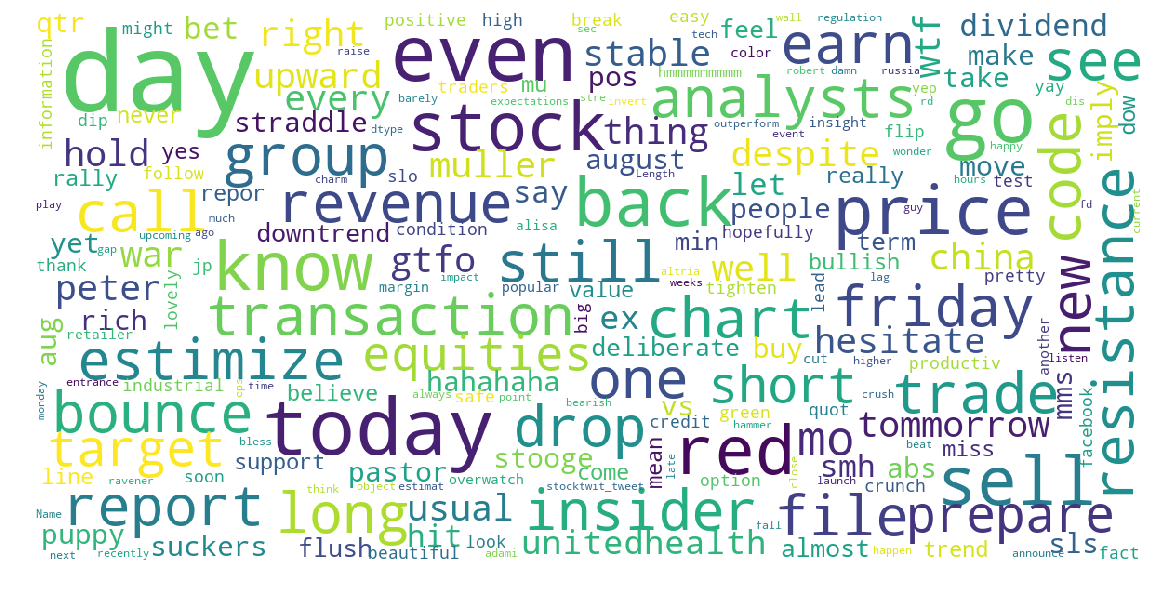

In [119]:
show_wordcloud(train["stocktwit_tweet"])

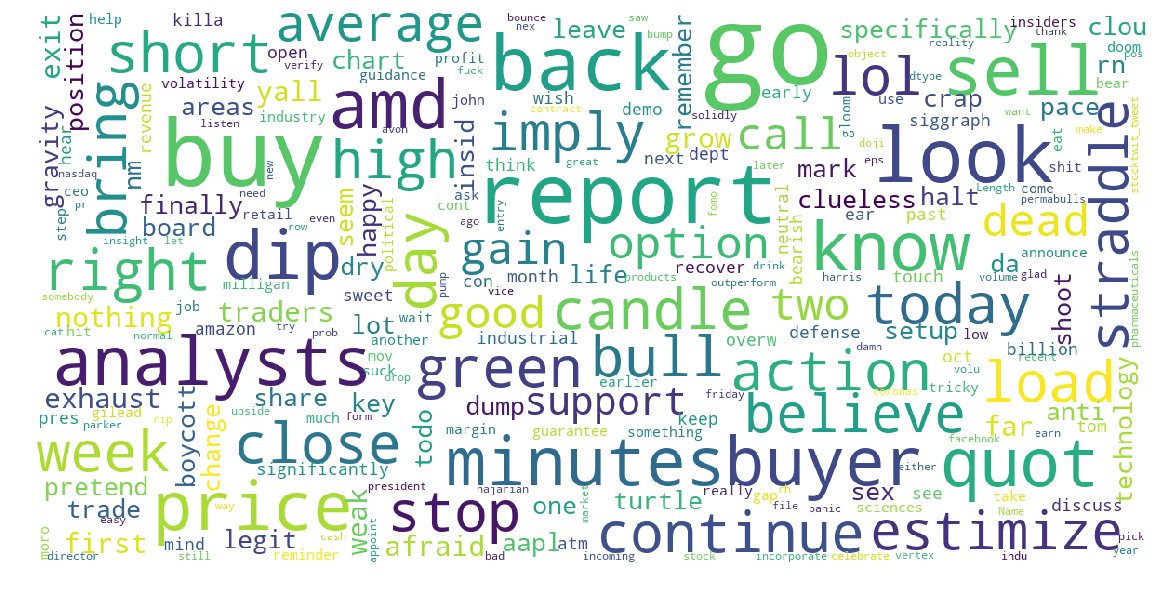

In [120]:
show_wordcloud(test["stocktwit_tweet"])

In [121]:
train.head()

,sentiment_score,stocktwit_tweet,ticker,date
0,3,go up but hesitate however chart stable go upward,$AMD,2018-09-19
1,3,despite china trade war hold well,$CAT,2018-10-09
2,2,wtf,$AVGO,2018-07-12
3,2,new insider file muller peter transaction code,$PH,2018-07-19
4,3,bounce tommorrow right thing gtfo,$FB,2018-08-23


In [122]:
test.head()

,stocktwit_tweet,ticker,date
0,nothing exit,$CELG,2018-10-25
1,yall exhaust buyer first green candle,$AMD,2018-07-13
2,day traders day,$AMD,2018-09-25
3,,$CBS,2018-07-27
4,weak price action far today afraid go short go...,$MU,2018-07-31


# Train Test & split

In [123]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(train['stocktwit_tweet'], train['sentiment_score'], test_size=0.3, random_state=14)

In [124]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)

(727391,)
(311740,)
(727391,)


# countvectorizer

1. The CountVectorizer provides a simple way to both tokenize a collection of text documents and build a vocabulary of known words, but also to encode new documents using that vocabulary
2. An encoded vector is returned with a length of the entire vocabulary and an integer count for the number of times each word appeared in the document.
3. These vectors will contain a lot of zeros and we call them sparse

In [125]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words='english',lowercase=True)
vect_train= vectorizer.fit_transform(x_train)

In [126]:
vect_test= vectorizer.transform(x_test)

In [127]:
vect_train.shape

(727391, 33278)

In [128]:
vect_test.shape

(311740, 33278)

In [129]:
type(vect_train)

scipy.sparse.csr.csr_matrix

In [130]:
testx=test.stocktwit_tweet

In [131]:
vect_testx=vectorizer.transform(testx)

In [132]:
vect_testx.shape

(265022, 33278)

# Multinominal NB for CV

In [133]:
from sklearn.naive_bayes import MultinomialNB
nb_clf_cv = MultinomialNB().fit(vect_train, y_train.astype('int')) #nb_clf is the classifier
pred_train_cv = nb_clf_cv.predict(vect_train)

In [134]:
from sklearn.metrics import confusion_matrix,accuracy_score
pred_test_cv = nb_clf_cv.predict(vect_test) #predict on test data
prediction = confusion_matrix(y_test.astype('int'),pred_test_cv) ##get confusion matrix for test predictions

In [135]:
from sklearn.metrics import classification_report
print(classification_report(y_train.astype('int'), pred_train_cv))

              precision    recall  f1-score   support

           0       0.56      0.54      0.55     64547
           1       0.56      0.33      0.41     84357
           2       0.70      0.78      0.74    324973
           3       0.44      0.42      0.43    145448
           4       0.55      0.61      0.58    108066

   micro avg       0.61      0.61      0.61    727391
   macro avg       0.56      0.53      0.54    727391
weighted avg       0.60      0.61      0.60    727391



In [136]:
print("Test Accuracy is ",accuracy_score(y_test.astype('int'),pred_test_cv))
print("\n\n",classification_report(y_test.astype('int'),pred_test_cv))

Test Accuracy is  0.5841855392314108


               precision    recall  f1-score   support

           0       0.53      0.51      0.52     27475
           1       0.52      0.31      0.38     36414
           2       0.69      0.76      0.73    139429
           3       0.40      0.38      0.39     62583
           4       0.52      0.59      0.55     45839

   micro avg       0.58      0.58      0.58    311740
   macro avg       0.53      0.51      0.52    311740
weighted avg       0.57      0.58      0.58    311740



In [137]:
print("Test Accuracy is ",accuracy_score(y_train.astype('int'),pred_train_cv))

Test Accuracy is  0.6072057531643916


# Linear SVC for CV

In [138]:
#from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
clf=LinearSVC(class_weight='balanced')
svc_clf_cv=clf.fit(vect_train, y_train.astype('int'))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [139]:
from sklearn.metrics import confusion_matrix,accuracy_score
pred_test_cv = clf.predict(vect_test) #predict on test data
prediction = confusion_matrix(y_test.astype('int'),pred_test_cv) 

In [140]:
from sklearn.metrics import classification_report
pred_train_cv = clf.predict(vect_train)
print(classification_report(y_train.astype('int'), pred_train_cv))

              precision    recall  f1-score   support

           0       0.56      0.66      0.61     64547
           1       0.55      0.49      0.51     84357
           2       0.74      0.82      0.78    324973
           3       0.59      0.39      0.47    145448
           4       0.61      0.69      0.65    108066

   micro avg       0.66      0.66      0.66    727391
   macro avg       0.61      0.61      0.60    727391
weighted avg       0.65      0.66      0.65    727391



In [141]:
print("Test Accuracy is ",accuracy_score(y_test.astype('int'),pred_test_cv))
print("\n\n",classification_report(y_test.astype('int'),pred_test_cv))

Test Accuracy is  0.6187784692371848


               precision    recall  f1-score   support

           0       0.51      0.60      0.56     27475
           1       0.48      0.42      0.45     36414
           2       0.72      0.79      0.75    139429
           3       0.51      0.34      0.41     62583
           4       0.57      0.65      0.61     45839

   micro avg       0.62      0.62      0.62    311740
   macro avg       0.56      0.56      0.55    311740
weighted avg       0.61      0.62      0.61    311740



In [142]:
print("Test Accuracy is ",accuracy_score(y_train.astype('int'),pred_train_cv))

Test Accuracy is  0.6617788782099311


In [143]:
vect_test.shape,vect_train.shape

((311740, 33278), (727391, 33278))

# logistic regression with CountVect

In [144]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(vect_train, y_train.astype('int'))
y_pred_log = logreg.predict(vect_test)
y_pred_log_train=logreg.predict(vect_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [145]:
from sklearn.metrics import classification_report,accuracy_score
print("Test Accuracy is ",accuracy_score(y_test,y_pred_log))

Test Accuracy is  0.6330243151344068


In [146]:
print("Test Accuracy is ",accuracy_score(y_train,y_pred_log_train))

Test Accuracy is  0.653752933429201


In [147]:
print(classification_report(y_test,y_pred_log))

              precision    recall  f1-score   support

           0       0.65      0.52      0.58     27475
           1       0.58      0.33      0.42     36414
           2       0.65      0.89      0.75    139429
           3       0.54      0.33      0.41     62583
           4       0.64      0.59      0.61     45839

   micro avg       0.63      0.63      0.63    311740
   macro avg       0.61      0.53      0.55    311740
weighted avg       0.62      0.63      0.61    311740



In [148]:
print(classification_report(y_train,y_pred_log_train))

              precision    recall  f1-score   support

           0       0.68      0.55      0.60     64547
           1       0.62      0.36      0.45     84357
           2       0.67      0.90      0.76    324973
           3       0.59      0.37      0.45    145448
           4       0.66      0.61      0.63    108066

   micro avg       0.65      0.65      0.65    727391
   macro avg       0.64      0.55      0.58    727391
weighted avg       0.65      0.65      0.63    727391



# SMOTE


SMOTE stands for Synthetic Minority Oversampling Technique. This is a statistical technique for increasing the number of cases in your dataset in a balanced way. The module works by generating new instances from existing minority cases that you supply as input. This implementation of SMOTE does not change the number of majority cases.

In [156]:
from imblearn.over_sampling import SMOTE

Using TensorFlow backend.


In [157]:
smote=SMOTE('all')

In [158]:
x_sm,y_sm=smote.fit_sample(vect_train,y_train)

In [159]:
print(x_sm.shape,y_sm.shape)

(1624865, 33278) (1624865,)


# Multinominal NB with SMOTE

In [160]:
from sklearn.naive_bayes import MultinomialNB
nb_clf_cv = MultinomialNB().fit(x_sm, y_sm.astype('int')) #nb_clf is the classifier
pred_train_cv = nb_clf_cv.predict(x_sm)

In [161]:
from sklearn.metrics import confusion_matrix,accuracy_score
pred_test_cv = nb_clf_cv.predict(vect_test) #predict on test data
prediction = confusion_matrix(y_test.astype('int'),pred_test_cv)

In [162]:
from sklearn.metrics import classification_report
print(classification_report(y_sm.astype('int'), pred_train_cv))

              precision    recall  f1-score   support

           0       0.51      0.64      0.57    324973
           1       0.60      0.41      0.49    324973
           2       0.62      0.55      0.58    324973
           3       0.43      0.39      0.40    324973
           4       0.54      0.69      0.61    324973

   micro avg       0.54      0.54      0.54   1624865
   macro avg       0.54      0.54      0.53   1624865
weighted avg       0.54      0.54      0.53   1624865



In [163]:
print("Test Accuracy is ",accuracy_score(y_test.astype('int'),pred_test_cv))
print("\n\n",classification_report(y_test.astype('int'),pred_test_cv))

Test Accuracy is  0.5007827035349971


               precision    recall  f1-score   support

           0       0.29      0.55      0.38     27475
           1       0.44      0.34      0.39     36414
           2       0.73      0.53      0.62    139429
           3       0.36      0.41      0.39     62583
           4       0.49      0.61      0.54     45839

   micro avg       0.50      0.50      0.50    311740
   macro avg       0.46      0.49      0.46    311740
weighted avg       0.55      0.50      0.51    311740



# TFIDF Vectorizer (Term Frequency — Inverse Document Frequency)

This is a technique to quantify a word in documents, we generally compute a weight to each word which signifies the importance of the word in the document and corpus. This method is a widely used technique in Information Retrieval and Text Mining


In [164]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(norm=None,min_df = 2, max_df = .95)
# TF-IDF feature matrix
tfidf_train = tfidf_vectorizer.fit_transform(x_train)
tfidf_train

<727391x28986 sparse matrix of type '<class 'numpy.float64'>'
	with 4262289 stored elements in Compressed Sparse Row format>

In [165]:
#Get doc-term matrix for test data
tfidf_val = tfidf_vectorizer.transform(x_test)
tfidf_val

<311740x28986 sparse matrix of type '<class 'numpy.float64'>'
	with 1823665 stored elements in Compressed Sparse Row format>

In [166]:
testx=test.stocktwit_tweet

In [167]:
tfidf_train.shape

(727391, 28986)

In [168]:
tfidfx = tfidf_vectorizer.transform(testx)# TFIDF vectorising for the given test data

In [169]:
tfidfx.shape

(265022, 28986)

# Multinominal NB for TFIDF

In [170]:
from sklearn.naive_bayes import MultinomialNB
nb_clf = MultinomialNB(alpha=1, fit_prior=True, class_prior=None).fit(tfidf_train, y_train.astype('int')) #nb_clf is the classifier
pred_train = nb_clf.predict(tfidf_train) #get predictions on train data

In [171]:
from sklearn.metrics import confusion_matrix,accuracy_score
pred = nb_clf.predict(tfidf_val) #predict on test data
prediction = confusion_matrix(y_test.astype('int'),pred) ##get confusion matrix for test predictions

In [172]:
from sklearn.metrics import classification_report
print(classification_report(y_train.astype('int'), pred_train))

              precision    recall  f1-score   support

           0       0.38      0.66      0.48     64547
           1       0.46      0.41      0.43     84357
           2       0.81      0.55      0.66    324973
           3       0.41      0.42      0.41    145448
           4       0.45      0.71      0.55    108066

   micro avg       0.54      0.54      0.54    727391
   macro avg       0.50      0.55      0.51    727391
weighted avg       0.60      0.54      0.55    727391



In [173]:
print("Test Accuracy is ",accuracy_score(y_test.astype('int'),pred))
print("\n\n",classification_report(y_test.astype('int'),pred))

Test Accuracy is  0.5052223006351446


               precision    recall  f1-score   support

           0       0.35      0.60      0.44     27475
           1       0.40      0.36      0.38     36414
           2       0.78      0.53      0.63    139429
           3       0.36      0.36      0.36     62583
           4       0.42      0.67      0.52     45839

   micro avg       0.51      0.51      0.51    311740
   macro avg       0.46      0.51      0.47    311740
weighted avg       0.56      0.51      0.52    311740



In [174]:
print("Test Accuracy is ",accuracy_score(y_train.astype('int'),pred_train))

Test Accuracy is  0.5424867780877135


# Linear SVC for TFIDF

In [175]:
#from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
clf=LinearSVC(class_weight='balanced')
svc_clf=clf.fit(tfidf_train,y_train.astype('int'))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [176]:
from sklearn.metrics import confusion_matrix,accuracy_score
pred = clf.predict(tfidf_val) #predict on test data
prediction = confusion_matrix(y_test.astype('int'),pred)

In [177]:
from sklearn.metrics import classification_report
pred_train = clf.predict(tfidf_train)
print(classification_report(y_train.astype('int'), pred_train))

              precision    recall  f1-score   support

           0       0.58      0.62      0.60     64547
           1       0.53      0.51      0.52     84357
           2       0.75      0.81      0.78    324973
           3       0.56      0.42      0.48    145448
           4       0.62      0.68      0.65    108066

   micro avg       0.66      0.66      0.66    727391
   macro avg       0.61      0.61      0.60    727391
weighted avg       0.65      0.66      0.65    727391



In [178]:
print("Test Accuracy is ",accuracy_score(y_test.astype('int'),pred))
print("\n\n",classification_report(y_test.astype('int'),pred))

Test Accuracy is  0.6165362160775005


               precision    recall  f1-score   support

           0       0.53      0.57      0.55     27475
           1       0.47      0.45      0.46     36414
           2       0.72      0.78      0.75    139429
           3       0.49      0.36      0.42     62583
           4       0.58      0.64      0.60     45839

   micro avg       0.62      0.62      0.62    311740
   macro avg       0.56      0.56      0.55    311740
weighted avg       0.61      0.62      0.61    311740



In [179]:
print("Test Accuracy is ",accuracy_score(y_train.astype('int'),pred_train))

Test Accuracy is  0.6580683566335025


#### As the accuracy of Linear SVC is good i prefered that as the final result 

In [180]:
train1.ticker= train1.ticker.replace('[^\w]', ' ',regex=True)# just keeping the words in the ticker

In [181]:
train1.ticker= train1.ticker.apply(lambda x : x.upper())# making everything in upper case

In [182]:
test1.ticker= test1.ticker.apply(lambda x : x.upper())# just keeping the words in the ticker

In [183]:
test1.ticker= test1.ticker.replace('[^\w]', ' ',regex=True)# making everything in upper case

In [184]:
#predicting the test file with Linear SVC
pred_test = clf.predict(tfidfx)

pred_test

array([2, 4, 2, ..., 2, 2, 3])

In [185]:
print(pred)
print(pred_train)

[4 0 2 ... 0 2 3]
[2 1 3 ... 2 2 2]


In [187]:
import numpy as np
#resettig the indexex

x_train_indexes=np.array(x_train.index)
x_test_indexes=np.array(x_test.index)

In [188]:
# converting array to a Dataframe
pred_train=pd.DataFrame(pred_train,columns=["JF8"],index=x_train_indexes)
pred=pd.DataFrame(pred,columns=["JF8"],index=x_test_indexes)

In [189]:
pred.head()
pred_train.head()

,JF8
359284,2
116469,1
716423,3
832306,4
827330,2


In [190]:
# joining both train and validation predicted values
SF8=pd.concat([pred_train,pred])

SF8.head()

,JF8
359284,2
116469,1
716423,3
832306,4
827330,2


In [191]:
# now merging the data with the predicted sentiment scores
merge=pd.merge(train1,SF8,how='inner',left_index=True,right_index=True)

merge.head()

,sentiment_score,stocktwit_tweet,ticker,date,JF8
0,3,$AMD going up but hesitating however chart is ...,AMD,2018-09-19,4
1,3,@inforlong @MariaGascon Despite\nChina trade w...,CAT,2018-10-09,3
2,2,$AVGO WTF?,AVGO,2018-07-12,2
3,2,$PH\n New Insider Filing On: \n MULLER KLAUS P...,PH,2018-07-19,2
4,3,$FB if it bounces tommorrow do the right thing...,FB,2018-08-23,1


In [192]:
#comparing both date and ticker taking the average of predicted sentiment scores
merge2=merge[['date','ticker','JF8']].groupby(['date', 'ticker']).mean()
merge2.shape

merge2.head()

JF8
date       ticker          
2018-07-01  AABA   2.000000
            AAL    2.333333
            AAP    1.000000
            AAPL   2.170732
            ABBV   1.666667

# CSV FILE PREPROCESSING

In [197]:
#reading the train csv file
train_data=pd.read_csv("/Users/gowtham/Downloads/PHD_BATCH_67_101119/train_factors-1573207730757.csv")

In [198]:
# reading the test csv file
test_data=pd.read_csv("/Users/gowtham/Downloads/TestData/test_factors.csv")

In [199]:
train_data.head()

,Id,date,ticker,SF1,SF2,SF3,SF4,SF5,SF6,SF7,alpha
0,1,21/08/18,$NTAP,-0.628652,0.988891,-0.055714,0.774379,0.551089,-1.329229,-0.995539,2
1,2,11/10/18,$WYNN,1.315786,1.438754,0.187327,0.608933,-1.153030,1.859441,0.730995,3
2,3,21/08/18,$DRI,-1.141388,-1.455016,0.332755,0.674502,0.111326,-0.478597,-1.488157,1
3,4,10/07/18,$ge,-0.054839,-1.454149,-0.162267,-0.681870,0.307869,-0.529987,0.404172,2
4,5,12/09/18,$FE,-0.686366,0.838865,0.073830,0.679024,0.329463,1.262782,-1.024042,2


In [200]:
test_data.head()

,Id,date,ticker,SF1,SF2,SF3,SF4,SF5,SF6,SF7
0,270007,21/07/18,$INTC,-3.062194,1.223466,1.741714,2.279266,-1.323573,-0.274912,-4.504449
1,270008,05/10/18,$CTSH,0.816263,-2.184408,0.157975,-0.264743,-0.836282,0.046276,0.826353
2,270009,01/10/18,$CB,0.401281,0.091604,0.083411,-1.147041,-0.485223,-0.601060,1.012811
3,270010,24/10/18,$CTAS,-0.783521,1.192929,0.813831,-0.368166,-1.113656,-0.553581,-0.683803
4,270011,27/07/18,$intc,0.796507,0.455341,0.679032,0.354336,-1.799055,0.126153,0.297111


In [201]:
#making a copy for submission file by just keeping ID
test_data2=test_data[["Id"]]


In [202]:
train_data.describe(include = 'all')

,Id,date,ticker,SF1,SF2,SF3,SF4,SF5,SF6,SF7,alpha
count,27006.000000,27006,27006,27006.000000,27006.000000,27006.000000,27006.000000,27006.000000,27006.000000,27006.000000,27006.000000
unique,NaN,123,1304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,26/07/18,$BAC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,344,90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,13503.500000,NaN,NaN,0.005429,-0.001005,-0.024421,-0.042420,0.041465,0.002597,0.036744,2.379582
std,7796.105021,NaN,NaN,0.941853,0.996130,0.539555,1.111309,0.976028,0.998839,1.204473,1.008681
min,1.000000,NaN,NaN,-4.114670,-4.578587,-2.609150,-6.329798,-5.480268,-4.338751,-5.347869,1.000000
25%,6752.250000,NaN,NaN,-0.596792,-0.666310,-0.300187,-0.767247,-0.518641,-0.668027,-0.688198,2.000000
50%,13503.500000,NaN,NaN,0.012104,-0.013257,-0.040786,-0.058629,0.072127,0.007417,0.081374,2.000000
75%,20254.750000,NaN,NaN,0.611574,0.669094,0.241424,0.677433,0.616538,0.674592,0.807556,3.000000


In [203]:
test_data.describe(include = 'all')

,Id,date,ticker,SF1,SF2,SF3,SF4,SF5,SF6,SF7
count,11575.000000,11575,11575,11575.000000,11575.000000,11575.000000,11575.000000,11575.000000,11575.000000,11575.000000
unique,NaN,123,1012,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,25/07/18,$AMZN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,152,46,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,275794.000000,NaN,NaN,0.001546,0.003995,-0.029754,-0.047606,0.053956,-0.000428,0.037914
std,3341.559017,NaN,NaN,0.924519,0.997903,0.537651,1.097842,0.965109,1.003503,1.192223
min,270007.000000,NaN,NaN,-4.130410,-4.034445,-4.259227,-4.704038,-4.545787,-4.317883,-5.031257
25%,272900.500000,NaN,NaN,-0.580470,-0.673206,-0.308838,-0.754051,-0.502280,-0.682896,-0.684029
50%,275794.000000,NaN,NaN,0.011865,-0.001464,-0.044590,-0.055108,0.084598,0.008303,0.081955
75%,278687.500000,NaN,NaN,0.600965,0.685805,0.228484,0.649046,0.620426,0.680800,0.807105


In [204]:
train_data.isna().sum()

Id        0
date      0
ticker    0
SF1       0
SF2       0
SF3       0
SF4       0
SF5       0
SF6       0
SF7       0
alpha     0
dtype: int64

In [205]:
test_data.isna().sum()

Id        0
date      0
ticker    0
SF1       0
SF2       0
SF3       0
SF4       0
SF5       0
SF6       0
SF7       0
dtype: int64

In [206]:
# TO convert to date time format
train_data['date']  = pd.to_datetime(train_data['date'], dayfirst=True)
test_data['date']  = pd.to_datetime(test_data['date'], dayfirst=True)

In [207]:
train_data.head()

,Id,date,ticker,SF1,SF2,SF3,SF4,SF5,SF6,SF7,alpha
0,1,2018-08-21,$NTAP,-0.628652,0.988891,-0.055714,0.774379,0.551089,-1.329229,-0.995539,2
1,2,2018-10-11,$WYNN,1.315786,1.438754,0.187327,0.608933,-1.153030,1.859441,0.730995,3
2,3,2018-08-21,$DRI,-1.141388,-1.455016,0.332755,0.674502,0.111326,-0.478597,-1.488157,1
3,4,2018-07-10,$ge,-0.054839,-1.454149,-0.162267,-0.681870,0.307869,-0.529987,0.404172,2
4,5,2018-09-12,$FE,-0.686366,0.838865,0.073830,0.679024,0.329463,1.262782,-1.024042,2


In [208]:
test_data.head()

,Id,date,ticker,SF1,SF2,SF3,SF4,SF5,SF6,SF7
0,270007,2018-07-21,$INTC,-3.062194,1.223466,1.741714,2.279266,-1.323573,-0.274912,-4.504449
1,270008,2018-10-05,$CTSH,0.816263,-2.184408,0.157975,-0.264743,-0.836282,0.046276,0.826353
2,270009,2018-10-01,$CB,0.401281,0.091604,0.083411,-1.147041,-0.485223,-0.601060,1.012811
3,270010,2018-10-24,$CTAS,-0.783521,1.192929,0.813831,-0.368166,-1.113656,-0.553581,-0.683803
4,270011,2018-07-27,$intc,0.796507,0.455341,0.679032,0.354336,-1.799055,0.126153,0.297111


In [209]:
train_data.date.describe()

count                   27006
unique                    123
top       2018-07-26 00:00:00
freq                      344
first     2018-07-01 00:00:00
last      2018-10-31 00:00:00
Name: date, dtype: object

In [210]:
train_data.shape

(27006, 11)

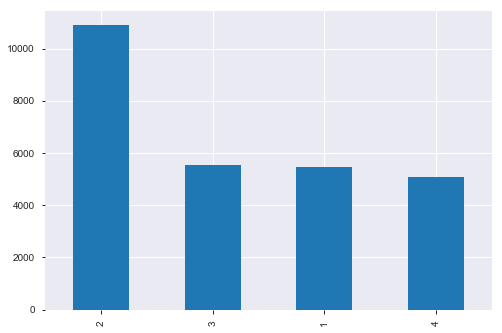

In [216]:
train_data.alpha.value_counts().plot(kind='bar')

# DONUT chart for alpha  with percentages

In [217]:
alpha1 = train_data.alpha.value_counts()[1]
alpha2 = train_data.alpha.value_counts()[2]
alpha3 = train_data.alpha.value_counts()[3]
alpha4 = train_data.alpha.value_counts()[4]

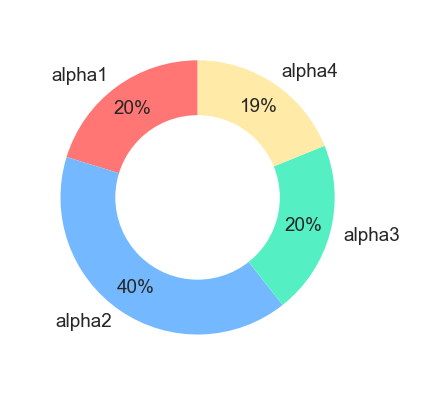

In [218]:
category_names = ['alpha1','alpha2','alpha3','alpha4']
sizes = [alpha1,alpha2,alpha3,alpha4]
custom_colours = ['#ff7675', '#74b9ff','#55efc4', '#ffeaa7']

plt.figure(figsize=(2, 2), dpi=227)
plt.pie(sizes, labels=category_names, textprops={'fontsize': 6}, startangle=90, 
       autopct='%1.0f%%', colors=custom_colours, pctdistance=0.8)

# draw circle
centre_circle = plt.Circle((0, 0), radius=0.6, fc='white')
plt.gca().add_artist(centre_circle)

plt.show()

In [219]:
train_data.tail()

,Id,date,ticker,SF1,SF2,SF3,SF4,SF5,SF6,SF7,alpha
27001,27002,2018-10-05,$RF,-0.946205,1.871952,0.068230,-0.348439,0.439969,0.297584,-0.634398,3
27002,27003,2018-07-30,$PG,-0.962175,0.623644,0.468051,0.245506,-0.290927,-0.658470,-1.112317,3
27003,27004,2018-10-16,$JCP,1.382757,-1.382645,-0.008343,-0.276788,-0.869303,-1.563029,1.372273,2
27004,27005,2018-07-27,$NVDA,1.088894,-1.123395,0.027197,0.914267,-0.680183,-0.375689,0.394336,3
27005,27006,2018-10-14,$WBA,-0.637959,0.621395,-0.636104,-0.810184,1.587782,-0.413540,0.101924,2


In [220]:
train_data.dtypes

Id                 int64
date      datetime64[ns]
ticker            object
SF1              float64
SF2              float64
SF3              float64
SF4              float64
SF5              float64
SF6              float64
SF7              float64
alpha              int64
dtype: object

In [221]:
test_data.dtypes

Id                 int64
date      datetime64[ns]
ticker            object
SF1              float64
SF2              float64
SF3              float64
SF4              float64
SF5              float64
SF6              float64
SF7              float64
dtype: object

In [222]:
train_data.head()

,Id,date,ticker,SF1,SF2,SF3,SF4,SF5,SF6,SF7,alpha
0,1,2018-08-21,$NTAP,-0.628652,0.988891,-0.055714,0.774379,0.551089,-1.329229,-0.995539,2
1,2,2018-10-11,$WYNN,1.315786,1.438754,0.187327,0.608933,-1.153030,1.859441,0.730995,3
2,3,2018-08-21,$DRI,-1.141388,-1.455016,0.332755,0.674502,0.111326,-0.478597,-1.488157,1
3,4,2018-07-10,$ge,-0.054839,-1.454149,-0.162267,-0.681870,0.307869,-0.529987,0.404172,2
4,5,2018-09-12,$FE,-0.686366,0.838865,0.073830,0.679024,0.329463,1.262782,-1.024042,2


In [223]:
test_data.head()

,Id,date,ticker,SF1,SF2,SF3,SF4,SF5,SF6,SF7
0,270007,2018-07-21,$INTC,-3.062194,1.223466,1.741714,2.279266,-1.323573,-0.274912,-4.504449
1,270008,2018-10-05,$CTSH,0.816263,-2.184408,0.157975,-0.264743,-0.836282,0.046276,0.826353
2,270009,2018-10-01,$CB,0.401281,0.091604,0.083411,-1.147041,-0.485223,-0.601060,1.012811
3,270010,2018-10-24,$CTAS,-0.783521,1.192929,0.813831,-0.368166,-1.113656,-0.553581,-0.683803
4,270011,2018-07-27,$intc,0.796507,0.455341,0.679032,0.354336,-1.799055,0.126153,0.297111


In [224]:
train_data.drop(['Id'], axis=1, inplace=True) # dropping id column

In [225]:
test_data.drop(['Id'], axis=1, inplace=True) # dropping id column

In [226]:
train_data.shape

(27006, 10)

In [227]:
test_data.shape

(11575, 9)

In [228]:
train_data1=train_data.copy()
test_data1=test_data.copy()

In [229]:
train_data1.ticker= train_data1.ticker.apply(lambda x : x.upper())# just keeping the words in the ticker

In [230]:
train_data1.ticker= train_data1.ticker.replace('[^\w]', ' ',regex=True)# making everything in upper case

In [231]:
test_data1.ticker= test_data1.ticker.apply(lambda x : x.upper())# just keeping the words in the ticker

In [232]:
test_data1.ticker= test_data1.ticker.replace('[^\w]', ' ',regex=True))# making everything in upper case

In [233]:

merge2.reset_index(level=['date', 'ticker'],inplace=True)

In [234]:
train_data1.head()

,date,ticker,SF1,SF2,SF3,SF4,SF5,SF6,SF7,alpha
0,2018-08-21,NTAP,-0.628652,0.988891,-0.055714,0.774379,0.551089,-1.329229,-0.995539,2
1,2018-10-11,WYNN,1.315786,1.438754,0.187327,0.608933,-1.153030,1.859441,0.730995,3
2,2018-08-21,DRI,-1.141388,-1.455016,0.332755,0.674502,0.111326,-0.478597,-1.488157,1
3,2018-07-10,GE,-0.054839,-1.454149,-0.162267,-0.681870,0.307869,-0.529987,0.404172,2
4,2018-09-12,FE,-0.686366,0.838865,0.073830,0.679024,0.329463,1.262782,-1.024042,2


In [235]:
#merging both the  jason and csv using date and ticker  columns
final = pd.merge(train_data1,merge2,how='inner', left_on=['date','ticker'], right_on = ['date','ticker'])

final.shape

(24834, 11)

In [236]:
#checking for null values
final.isna().sum()


date      0
ticker    0
SF1       0
SF2       0
SF3       0
SF4       0
SF5       0
SF6       0
SF7       0
alpha     0
JF8       0
dtype: int64

In [237]:
#predicted sentiment score value counts
final.JF8.value_counts()

2.000000    4792
3.000000     939
1.000000     933
2.500000     877
1.500000     785
2.333333     685
1.666667     591
2.250000     471
1.333333     409
2.666667     393
1.750000     385
2.200000     340
0.000000     327
4.000000     327
2.400000     303
1.800000     278
2.166667     276
2.285714     220
1.833333     217
1.600000     210
2.142857     193
2.600000     181
1.857143     173
2.750000     160
2.125000     155
2.428571     142
2.375000     138
2.111111     132
1.250000     132
2.222222     123
            ... 
1.897436       1
1.965217       1
2.214815       1
2.368932       1
2.061538       1
2.178744       1
1.949821       1
2.703704       1
2.096849       1
2.425532       1
2.344262       1
1.982456       1
2.355469       1
2.829268       1
2.072848       1
1.235294       1
1.758621       1
2.308725       1
2.329412       1
2.009434       1
2.345238       1
2.162679       1
2.730769       1
1.708333       1
2.017544       1
2.049180       1
2.373041       1
2.041096      

In [238]:
# adding predicted sentiment score to jason test data
test1['JF8']=pred_test

In [239]:
test1.head()

,stocktwit_tweet,ticker,date,JF8
0,$CELG nothing to be exited about,CELG,2018-10-25,2
1,$AMD yall exhaust your buyer on first green ca...,AMD,2018-07-13,4
2,$AMD day traders day.,AMD,2018-09-25,2
3,$CBS https://tenor.com/wLB8.gif,CBS,2018-07-27,2
4,$MU weak price action so far today. Don’t be a...,MU,2018-07-31,0


In [240]:
merge3=test1[['date','ticker','JF8']].groupby(['date', 'ticker']).mean()
merge3.shape

(35253, 1)

In [241]:
merge3.head()

JF8
date       ticker          
2018-07-01  AAL    0.000000
            AAPL   2.363636
            AEP    2.000000
            AES    3.000000
            ALXN   0.000000

In [242]:
#reseting indexes
merge3.reset_index(level=['date', 'ticker'],inplace=True)

In [243]:
#final test file merging with data and ticker common in both json and csv file
final_test = pd.merge(test_data1,merge3,how='left', left_on=['date','ticker'], right_on = ['date','ticker'])

In [244]:
final_test.shape

(11575, 10)

In [245]:
final_test.head()

,date,ticker,SF1,SF2,SF3,SF4,SF5,SF6,SF7,JF8
0,2018-07-21,INTC,-3.062194,1.223466,1.741714,2.279266,-1.323573,-0.274912,-4.504449,3.000000
1,2018-10-05,CTSH,0.816263,-2.184408,0.157975,-0.264743,-0.836282,0.046276,0.826353,3.000000
2,2018-10-01,CB,0.401281,0.091604,0.083411,-1.147041,-0.485223,-0.601060,1.012811,2.000000
3,2018-10-24,CTAS,-0.783521,1.192929,0.813831,-0.368166,-1.113656,-0.553581,-0.683803,2.500000
4,2018-07-27,INTC,0.796507,0.455341,0.679032,0.354336,-1.799055,0.126153,0.297111,2.373016


In [246]:
final_test.isna().sum()

date      0
ticker    0
SF1       0
SF2       0
SF3       0
SF4       0
SF5       0
SF6       0
SF7       0
JF8       0
dtype: int64

In [247]:
X = final.copy().drop(["alpha","ticker","date"],axis=1)#drop the alpha ticker and date
Y = final["alpha"]# alpha column

In [248]:
X.head()

,SF1,SF2,SF3,SF4,SF5,SF6,SF7,JF8
0,-0.628652,0.988891,-0.055714,0.774379,0.551089,-1.329229,-0.995539,2.076923
1,1.315786,1.438754,0.187327,0.608933,-1.153030,1.859441,0.730995,2.000000
2,-1.141388,-1.455016,0.332755,0.674502,0.111326,-0.478597,-1.488157,1.666667
3,-0.054839,-1.454149,-0.162267,-0.681870,0.307869,-0.529987,0.404172,2.317460
4,0.394782,-0.532809,0.539375,1.934485,-1.177355,1.519912,-0.959793,2.317460


In [249]:
Y.head()

0    2
1    3
2    1
3    2
4    3
Name: alpha, dtype: int64

In [250]:
X.dtypes

SF1    float64
SF2    float64
SF3    float64
SF4    float64
SF5    float64
SF6    float64
SF7    float64
JF8    float64
dtype: object

In [251]:
from sklearn.model_selection import train_test_split
x_train1, x_test1, y_train1, y_test1 = train_test_split(X, Y, test_size=0.30,random_state=4)

In [252]:
print(x_train1.shape)
print(y_train1.shape)
print(x_test1.shape)
print(y_test1.shape)

(17383, 8)
(17383,)
(7451, 8)
(7451,)


# Logistic regression

In [253]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train1,y_train1)
y_pred_log = logreg.predict(x_test1)
y_pred_log_train=logreg.predict(x_train1)

In [254]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,f1_score
import sklearn.metrics as metrics
print(metrics.accuracy_score(y_test1,y_pred_log))

0.4514830224130989


In [255]:
print(metrics.accuracy_score(y_train1,y_pred_log_train))

0.4411206351032618


In [256]:
print(metrics.f1_score(y_train1,y_pred_log_train,average='macro'))

0.2667159871816429


In [257]:
print(metrics.f1_score(y_test1,y_pred_log,average='macro'))

0.2716915451070611


In [258]:
print(classification_report(y_test1,y_pred_log))

              precision    recall  f1-score   support

           1       0.79      0.11      0.20      1444
           2       0.45      0.94      0.61      3026
           3       0.40      0.20      0.27      1654
           4       0.08      0.00      0.01      1327

   micro avg       0.45      0.45      0.45      7451
   macro avg       0.43      0.32      0.27      7451
weighted avg       0.44      0.45      0.35      7451



In [259]:
print(classification_report(y_train1,y_pred_log_train))

              precision    recall  f1-score   support

           1       0.74      0.10      0.18      3426
           2       0.44      0.94      0.60      6901
           3       0.39      0.21      0.27      3745
           4       0.11      0.01      0.01      3311

   micro avg       0.44      0.44      0.44     17383
   macro avg       0.42      0.32      0.27     17383
weighted avg       0.43      0.44      0.34     17383



In [260]:
from mlxtend.plotting import plot_learning_curves

([0.570771001150748,
  0.5724971231300345,
  0.5650172612197929,
  0.5613404285919746,
  0.5617305258313198,
  0.5598811007766804,
  0.5622945430637738,
  0.5619157198331656,
  0.560214778828944,
  0.5588793648967382],
 [0.5552274862434573,
  0.5537511743390149,
  0.552677492953966,
  0.5479801368943766,
  0.5439538317004429,
  0.5461011944705408,
  0.5494564487988189,
  0.5471748758555899,
  0.5481143470675077,
  0.5485169775869011])

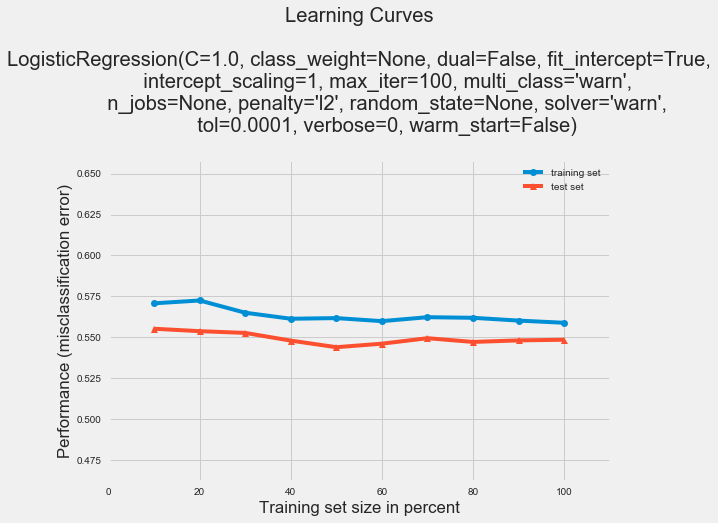

In [261]:
plot_learning_curves(x_train1,y_train1,x_test1,y_test1,logreg)

# Decission Tree Classifier

In [262]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier

In [263]:
dtc = DecisionTreeClassifier(criterion="entropy",max_depth=10, min_samples_leaf=15,min_samples_split=20)

In [264]:
dtc.fit(x_train1, y_train1)
dtc_pred_train=dtc.predict(x_train1)
dtc_pred_val = dtc.predict(x_test1)

In [265]:
print(metrics.accuracy_score(y_test1,dtc_pred_val))

0.6404509461817206


In [266]:
print(metrics.accuracy_score(y_train1,dtc_pred_train))

0.692112983949836


In [267]:
print(classification_report(y_test1,dtc_pred_val))

              precision    recall  f1-score   support

           1       0.63      0.51      0.56      1444
           2       0.68      0.91      0.78      3026
           3       0.62      0.46      0.52      1654
           4       0.53      0.39      0.45      1327

   micro avg       0.64      0.64      0.64      7451
   macro avg       0.61      0.57      0.58      7451
weighted avg       0.63      0.64      0.62      7451



In [268]:
print(classification_report(y_train1,dtc_pred_train))

              precision    recall  f1-score   support

           1       0.72      0.58      0.64      3426
           2       0.70      0.95      0.80      6901
           3       0.69      0.52      0.59      3745
           4       0.64      0.47      0.54      3311

   micro avg       0.69      0.69      0.69     17383
   macro avg       0.69      0.63      0.65     17383
weighted avg       0.69      0.69      0.68     17383



In [269]:
print(f1_score(y_test1,dtc_pred_val,average='macro'))

print(f1_score(y_train1,dtc_pred_train,average='macro'))

0.5782051751894386
0.6453522972725398


In [270]:
from mlxtend.plotting import plot_learning_curves

([0.30897583429229,
  0.3187571921749137,
  0.3224012274645186,
  0.3156910686034805,
  0.30813485214589803,
  0.31306932591811293,
  0.2990631163708087,
  0.3125269667769308,
  0.30842495525441066,
  0.30788701605016394],
 [0.40531472285599246,
  0.39028318346530666,
  0.4054489330291236,
  0.3751174339014897,
  0.3708227083612938,
  0.3829016239430949,
  0.3607569453764595,
  0.3611595758958529,
  0.35364380620051,
  0.3594148436451483])

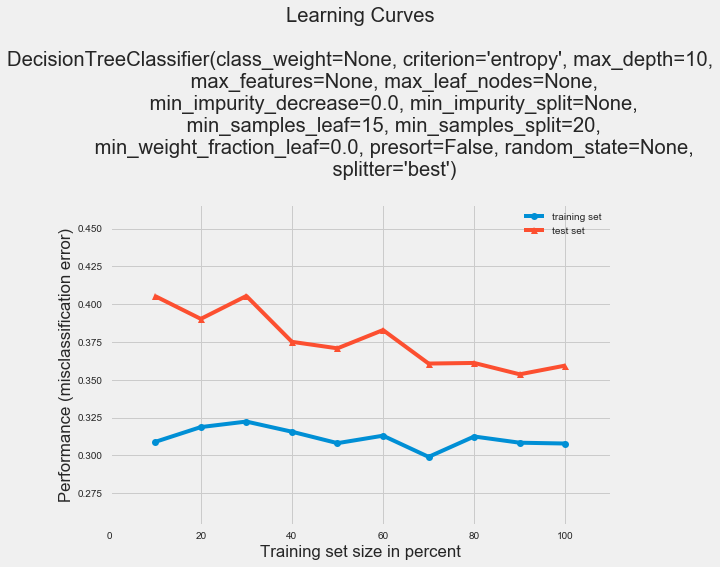

In [271]:
plot_learning_curves(x_train1,y_train1,x_test1,y_test1,dtc)

# ANN (Artifical Neural Network)

In [272]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras import regularizers, optimizers

adam = keras.optimizers.Adam(lr=0.01, decay=0.0005)

classifier=Sequential()

earlystopper = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
reduce_lr = ReduceLROnPlateau(patience=5, verbose=1)

# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim = 10, init = 'uniform', activation = 'relu', input_dim = 8))

# Adding the second hidden layer
classifier.add(Dense(output_dim = 16, init = 'uniform', activation = 'relu'))

# Adding the second hidden layer
classifier.add(Dense(output_dim = 16, init = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(output_dim = 8, init = 'uniform', activation = 'softmax',kernel_regularizer=regularizers.l2()))

#Compiling the ANN
classifier.compile(optimizer = adam, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
history=classifier.fit(x_train1, y_train1, validation_data=(x_test1,y_test1),batch_size = 5, nb_epoch = 200)

Train on 17383 samples, validate on 7451 samples
Epoch 1/200
17383/17383 [==============================] - 3s 188us/step - loss: 1.1169 - accuracy: 0.5287 - val_loss: 1.0464 - val_accuracy: 0.5664
Epoch 2/200
17383/17383 [==============================] - 3s 175us/step - loss: 0.9573 - accuracy: 0.5937 - val_loss: 0.9248 - val_accuracy: 0.6214
Epoch 3/200
17383/17383 [==============================] - 3s 178us/step - loss: 0.9052 - accuracy: 0.6247 - val_loss: 0.9068 - val_accuracy: 0.6303
Epoch 4/200
17383/17383 [==============================] - 3s 190us/step - loss: 0.8669 - accuracy: 0.6418 - val_loss: 0.8547 - val_accuracy: 0.6621
Epoch 5/200
17383/17383 [==============================] - 3s 197us/step - loss: 0.8354 - accuracy: 0.6652 - val_loss: 0.8274 - val_accuracy: 0.6727
Epoch 6/200
17383/17383 [==============================] - 3s 198us/step - loss: 0.8124 - accuracy: 0.6780 - val_loss: 0.8154 - val_accuracy: 0.6776
Epoch 7/200
17383/17383 [==============================] 

In [273]:
pd.DataFrame(history.history)

,val_loss,val_accuracy,loss,accuracy
0,1.046423,0.566367,1.116884,0.528735
1,0.924811,0.621393,0.957337,0.593741
2,0.906755,0.630251,0.905176,0.624748
3,0.854655,0.662059,0.866897,0.641834
4,0.827395,0.672661,0.835364,0.665248
5,0.815421,0.677627,0.812394,0.678019
6,0.803018,0.683264,0.796978,0.687108
7,0.804691,0.683398,0.785822,0.690042
8,0.788811,0.690109,0.778001,0.695622
9,0.779495,0.695477,0.769292,0.701030


In [274]:
train_acc = history.history['accuracy']
train_loss = history.history['loss']

val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

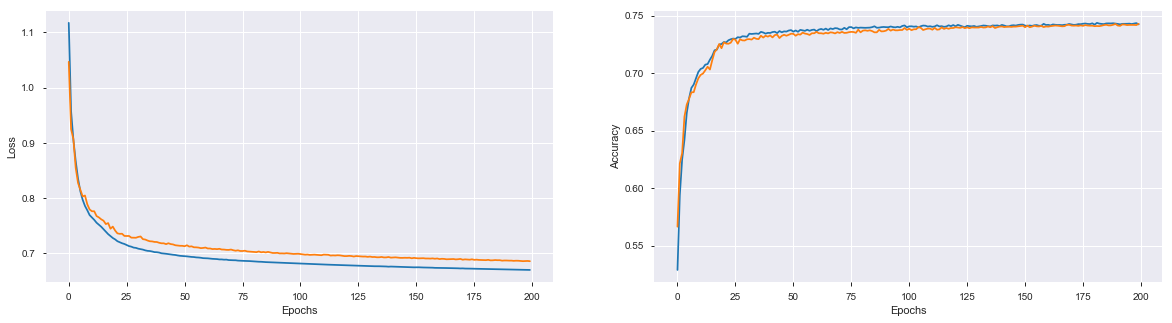

In [275]:
from matplotlib import pyplot as plt #plt is a visualization module in matplotlib.  
%matplotlib inline 
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(train_loss)
plt.plot(val_loss)

plt.subplot(1,2,2)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(train_acc)
plt.plot(val_acc)
plt.show()

In [276]:
from sklearn.metrics import accuracy_score
perceptron_train_preds = classifier.predict_classes(x_train1)
perceptron_test_preds = classifier.predict_classes(x_test1)

print("Train Accuracy :",accuracy_score(y_train1,perceptron_train_preds))
print("Test_Accuray   : ",accuracy_score(y_test1,perceptron_test_preds))

Train Accuracy : 0.7431398492780302
Test_Accuray   :  0.7428533082807677


In [277]:
print(classification_report(y_train1,perceptron_train_preds))
print(classification_report(y_test1,perceptron_test_preds))

              precision    recall  f1-score   support

           1       0.67      0.57      0.61      3426
           2       0.87      0.97      0.92      6901
           3       0.63      0.55      0.59      3745
           4       0.62      0.67      0.65      3311

   micro avg       0.74      0.74      0.74     17383
   macro avg       0.70      0.69      0.69     17383
weighted avg       0.73      0.74      0.74     17383

              precision    recall  f1-score   support

           1       0.65      0.56      0.60      1444
           2       0.87      0.97      0.92      3026
           3       0.66      0.56      0.60      1654
           4       0.61      0.66      0.63      1327

   micro avg       0.74      0.74      0.74      7451
   macro avg       0.70      0.69      0.69      7451
weighted avg       0.73      0.74      0.74      7451



In [278]:
print(f1_score(y_train1,perceptron_train_preds,average='macro'))
print(f1_score(y_test1,perceptron_test_preds,average='macro'))

0.6918818936963492
0.6884183316744855


# Mlp classifier (Multi layer perceptron)

In [280]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score,recall_score

model =  MLPClassifier(activation='relu', alpha=0.0001, batch_size=3, beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(60,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1234, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [281]:
model.fit(x_train1,y_train1)

MLPClassifier(activation='relu', alpha=0.0001, batch_size=3, beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(60,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=1234, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [282]:

sklearn_mlp_train_preds = model.predict(x_train1)
sklearn_mlp_validation_preds = model.predict(x_test1)

In [283]:
print(classification_report(y_train1,sklearn_mlp_train_preds))
print(classification_report(y_test1,sklearn_mlp_validation_preds))

              precision    recall  f1-score   support

           1       0.72      0.59      0.65      3426
           2       0.84      0.98      0.90      6901
           3       0.67      0.61      0.64      3745
           4       0.73      0.69      0.71      3311

   micro avg       0.77      0.77      0.77     17383
   macro avg       0.74      0.72      0.72     17383
weighted avg       0.76      0.77      0.76     17383

              precision    recall  f1-score   support

           1       0.69      0.57      0.63      1444
           2       0.83      0.97      0.90      3026
           3       0.67      0.59      0.63      1654
           4       0.70      0.66      0.68      1327

   micro avg       0.76      0.76      0.76      7451
   macro avg       0.72      0.70      0.71      7451
weighted avg       0.74      0.76      0.75      7451



In [284]:
print(f1_score(y_train1,sklearn_mlp_train_preds,average='micro'))
print(f1_score(y_test1,sklearn_mlp_validation_preds,average='micro'))

0.7667261117183456
0.7550664340357


In [285]:
print(f1_score(y_train1,sklearn_mlp_train_preds,average='macro'))
print(f1_score(y_test1,sklearn_mlp_validation_preds,average='macro'))

0.7246507626189309
0.7078781986749586


([0.2186421173762946,
  0.23964326812428077,
  0.2483697736862294,
  0.23486264921616568,
  0.23633643999539755,
  0.2285933454789529,
  0.23438527284681132,
  0.23558176326765426,
  0.2286499616466377,
  0.2332738882816545],
 [0.30989128975976377,
  0.27164139041739366,
  0.27352033284122934,
  0.2575493222386257,
  0.2559388001610522,
  0.2414441014628909,
  0.24922829150449605,
  0.24654408804187358,
  0.24238357267480876,
  0.2449335659643001])

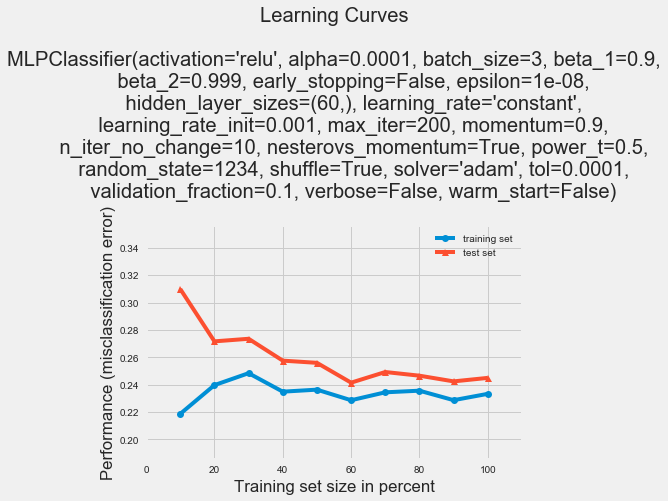

In [286]:
plot_learning_curves(x_train1,y_train1,x_test1,y_test1,model)

In [300]:
final_test.head()

,SF1,SF2,SF3,SF4,SF5,SF6,SF7,JF8
0,-3.062194,1.223466,1.741714,2.279266,-1.323573,-0.274912,-4.504449,3.000000
1,0.816263,-2.184408,0.157975,-0.264743,-0.836282,0.046276,0.826353,3.000000
2,0.401281,0.091604,0.083411,-1.147041,-0.485223,-0.601060,1.012811,2.000000
3,-0.783521,1.192929,0.813831,-0.368166,-1.113656,-0.553581,-0.683803,2.500000
4,0.796507,0.455341,0.679032,0.354336,-1.799055,0.126153,0.297111,2.373016


In [295]:
final_test.drop(['date','ticker'], axis=1, inplace=True)

In [301]:
sklearn_mlp_validation1= model.predict(final_test)

In [302]:
final_df=pd.DataFrame()
final_df=test_data2
final_df["alpha"]=pd.Series(sklearn_mlp_validation1)

In [303]:
final_df.alpha.value_counts()

2    5455
4    2158
1    2109
3    1853
Name: alpha, dtype: int64

In [305]:
final_df.head()

,Id,alpha
0,270007,4
1,270008,4
2,270009,2
3,270010,1
4,270011,4


In [306]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score,recall_score

model1 =  MLPClassifier(activation='relu', alpha=0.0001, batch_size=3, beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(80,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1234, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [307]:
model1.fit(x_train1,y_train1)

MLPClassifier(activation='relu', alpha=0.0001, batch_size=3, beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(80,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=1234, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [308]:

sklearn_mlp_train_preds = model1.predict(x_train1)
sklearn_mlp_validation_preds = model1.predict(x_test1)

In [309]:
print(classification_report(y_train1,sklearn_mlp_train_preds))
print(classification_report(y_test1,sklearn_mlp_validation_preds))

              precision    recall  f1-score   support

           1       0.71      0.63      0.67      3426
           2       0.86      0.97      0.91      6901
           3       0.66      0.60      0.63      3745
           4       0.73      0.72      0.72      3311

   micro avg       0.77      0.77      0.77     17383
   macro avg       0.74      0.73      0.73     17383
weighted avg       0.76      0.77      0.77     17383

              precision    recall  f1-score   support

           1       0.68      0.60      0.64      1444
           2       0.86      0.96      0.91      3026
           3       0.66      0.59      0.62      1654
           4       0.70      0.71      0.71      1327

   micro avg       0.76      0.76      0.76      7451
   macro avg       0.73      0.72      0.72      7451
weighted avg       0.76      0.76      0.76      7451



In [310]:
print(f1_score(y_train1,sklearn_mlp_train_preds,average='micro'))
print(f1_score(y_test1,sklearn_mlp_validation_preds,average='micro'))

0.7731116608180406
0.7640585156354852


In [311]:
print(f1_score(y_train1,sklearn_mlp_train_preds,average='macro'))
print(f1_score(y_test1,sklearn_mlp_validation_preds,average='macro'))

0.7327393542317329
0.7198331239922588


In [312]:
sklearn_mlp_validation1= model1.predict(final_test)

final_df=pd.DataFrame()
final_df=test_data2
final_df["alpha"]=pd.Series(sklearn_mlp_validation1)

final_df.alpha.value_counts()

2    5244
4    2262
1    2262
3    1807
Name: alpha, dtype: int64

([0.2042577675489068,
  0.22468354430379747,
  0.2330264672036824,
  0.2339997123543794,
  0.2374870555747325,
  0.22878511841979096,
  0.22863247863247863,
  0.23270530706169998,
  0.23919713628228076,
  0.2268883391819594],
 [0.319957052744598,
  0.2745940142262783,
  0.264394041068313,
  0.2586230036236747,
  0.2517782847939874,
  0.24936250167762716,
  0.24372567440611997,
  0.2473493490806603,
  0.2512414441014629,
  0.23594148436451484])

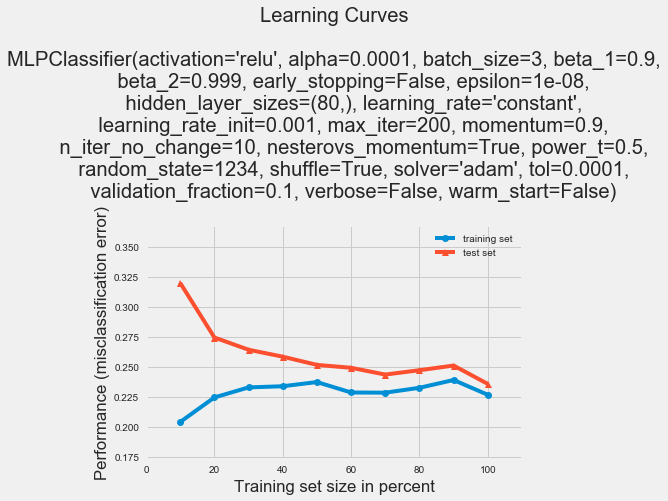

In [313]:
plot_learning_curves(x_train1,y_train1,x_test1,y_test1,model1)